# Teste das funções desenvolvidas para treinamento de ELM

In [139]:
# Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from elm import *

# Estilo para os plots
plt.style.use(['grid', 'science', 'notebook'])

## Teste em problema de classificação

In [108]:
# Carregar a base de dados (neste caso, dados de classificação de câncer de mama)
data = load_breast_cancer()
x = data.data
y = data.target

# Separar em conjuntos de treinamento e teste (é importante separar ANTES
# de normalizar, pois não teríamos acesso aos dados de teste de antemão
# na vida real)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2003)

# Normalizar os dados entre -1 e 1
x_train_norm, x_test_norm = normalize_by_train(x_train, x_test)
y_train_norm, y_test_norm = normalize_by_train(y_train, y_test)

### Avaliação do erro de treinamento

In [119]:
# Treinamento da ELM
Z, H, W = train_elm(x_train_norm, y_train_norm, 100, 'lstsq')

# A ELM retorna valores contínuos, então preciso discretizá-los para fazer a classificação.
# Como quero classificar amostras como -1 ou 1, vou utilizar o sinal de cada saída da ELM como
# sua resposta.
yhat_train = np.sign(H@W)

cm = confusion_matrix(y_train_norm, yhat_train)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[148   6]
 [  0 244]]


A matriz de confusão apresenta na diagonal principal a quantidade de amostras em que o modelo acertou a classificação (TP, TN) e na diagonal secundária a quantidade de amostras em que ele errou (FP, FN). Nesse caso, o modelo aprendeu bem.

### Avaliação do erro de teste

In [120]:
# Teste do modelo
yhat_test = test_elm(x_test_norm, Z, W)
yhat_test = np.sign(yhat_test)

cm_test = confusion_matrix(y_test_norm, yhat_test)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(cm_test)

Matriz de Confusão:
[[ 52   6]
 [  0 113]]


Observa-se que o modelo também desempenhou muito bem na classificação dos dados de teste, indicando que ele generalizou bem. O erro aumenta quando eu aumento muito o número de neurônios na rede, pois ela passa a sofrer com sobreajuste aos dados de treinaemento.

---

## Teste em problema de regressão

In [123]:
# Carregar a base de dados (neste caso, dados de regressão relacionados a diabetes)
regression_data = load_diabetes()
x_reg = regression_data.data
y_reg = regression_data.target

# Separar em conjuntos de treinamento e teste (é importante separar ANTES
# de normalizar, pois não teríamos acesso aos dados de teste de antemão
# na vida real)
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.3, random_state=2003)

# Normalizar os dados entre -1 e 1
x_reg_train_norm, x_reg_test_norm = normalize_by_train(x_reg_train, x_reg_test)
y_reg_train_norm, y_reg_test_norm = normalize_by_train(y_reg_train, y_reg_test)

### Avaliação do erro de treinamento

MSE de treinamento: 0.07705965687787694


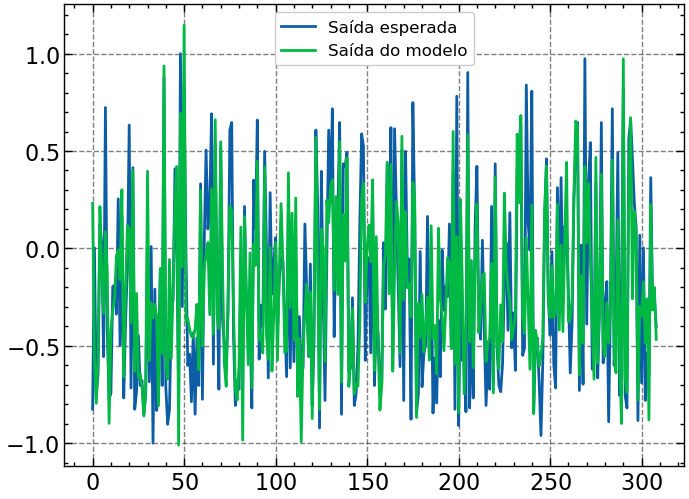

In [150]:
# Treinamento da ELM
Z_reg, H_reg, W_reg = train_elm(x_reg_train_norm, y_reg_train_norm, 100, 'lstsq')

# Saída do treinamento (a saída da ELM é linear, então não preciso transformar os dados em problemas
# de regressão)
yhat_reg_train = H_reg@W_reg

# Avaliação do modelo
plt.plot(y_reg_train_norm)
plt.plot(yhat_reg_train)
plt.legend(['Saída esperada', 'Saída do modelo'], loc='best', frameon='True', fontsize=12)
MSE_train = np.mean((y_reg_train_norm - yhat_reg_train)**2, axis=0)
print(f"MSE de treinamento: {MSE_train}")
plt.show()

### Avaliação do erro de teste

MSE de teste: 0.21995032917100893


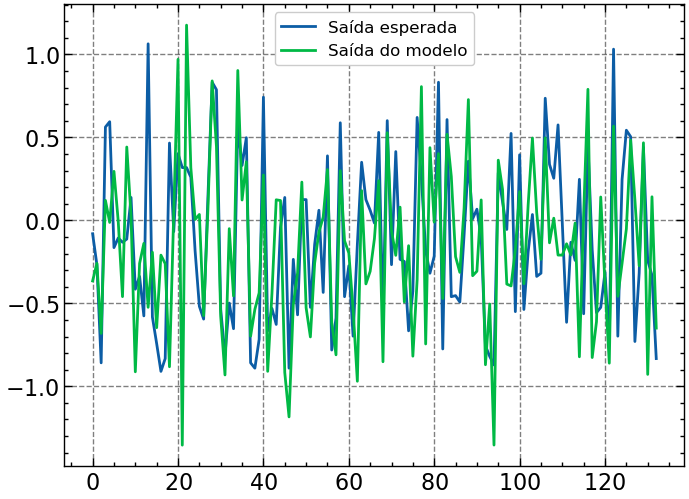

In [151]:
# Teste do modelo
yhat_reg_test = test_elm(x_reg_test_norm, Z_reg, W_reg)

# Avaliação do modelo
plt.plot(y_reg_test_norm)
plt.plot(yhat_reg_test)
plt.legend(['Saída esperada', 'Saída do modelo'], loc='best', frameon='True', fontsize=12)
MSE_test = np.mean((y_reg_test_norm - yhat_reg_test)**2, axis=0)
print(f"MSE de teste: {MSE_test}")
plt.show()

Os testes mostraram que a implementação do modelo (com solução de mínimos quadrados) está funcionando bem. Agora, preciso avaliar o treinamento com aprendizado hebbiano.

---